# Final report

## First stage - classic ML tools

We prepared the data from old contests, each entry consists of:
* User
* Contest ID
* Start of the contest (day and hour)
* Duration of the contest
* Rating before contest
* Rating change during the contest
* Correlation between this user and the author (defined by old contests that they have written together)

As always, we divided the dataset into two parts - training data, and test data. We used training data to train our decision tree/random forest/boosting, and later tested it with test data.


### Decision trees, Random forests and Boosting

Unfortunately, we met several challenges. The most problematic was the enormous number of entries. These structures weren't able to handle this amount of data (even few thousands entries took forever to prepare the model), so we couldn't train our model on whole training dataset. Because the results on small chunks of data, weren't too promising, we couldn't find out the correct parameters for our structures.
The other challenge was the fact that the data for codeforces isn't perfect. For example, many authors were missing for contests, often people doesn't share their nationality, so we couldn't use many features that could possibly influence the result.

We decided to remove some features and focus on the most important ones. Then it turned out, that most of them has zero correlation with the predicted result (either rank or rating). That's why we decided to acknowledge this approach as failed, and try different ones.

### KNN

### Regressions

The results were not satisfying (tried different data manipulations and approaches - dividing participants into sets and interfer results from sets, predicting results using only individual participant history results, predicting the rank change (binary and numerically)

### Neural networks

## Second stage - rating systems

### Elo rating

#### Basics
Elo rating is prepared for duels between two players. It is a basic rating system, which keeps only the user rating. 

We tested it in two ways:
- Treating each contest for a player as a duel
- Treating each participant in a contest as a duel partner

The first option did not gave any satisfactory results, this is why we focused on the second model.

The second option for one player calculated summed up rating change between other participants and changed the rating after the contest.

The model have three hyperparameters which seems independent:
- BasicRating - rating with which the user starts
- K - value which parameterize the rating change
- EloConst1 - value which parameterize the probability of winning with oponnent

#### Results
We tried to optimize the error between the predicted contest place and the real one.

Errors for the basic model (BaseRating = 1200, k = 1, EloConst1 = 400)

sqrt_err: 18.873759321330645 mean +- 4.774499376749239 stdev


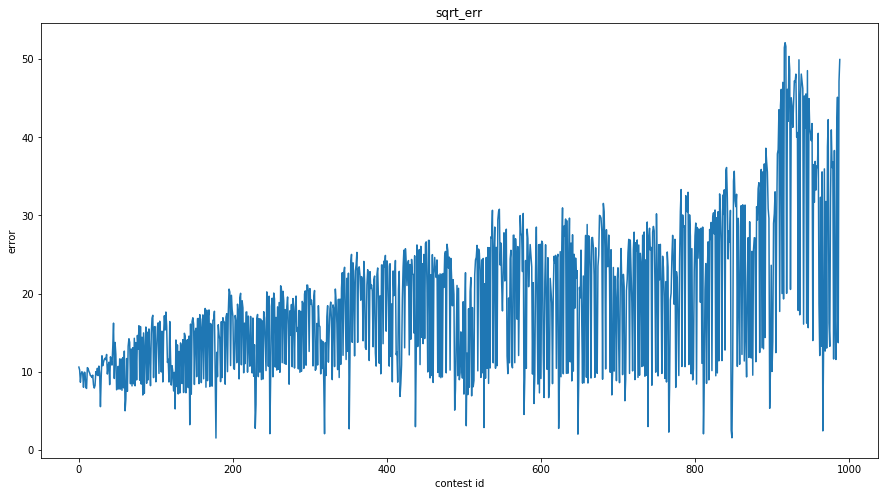

linear_err: 540.482170786376 mean +- 275.79070617469995 stdev


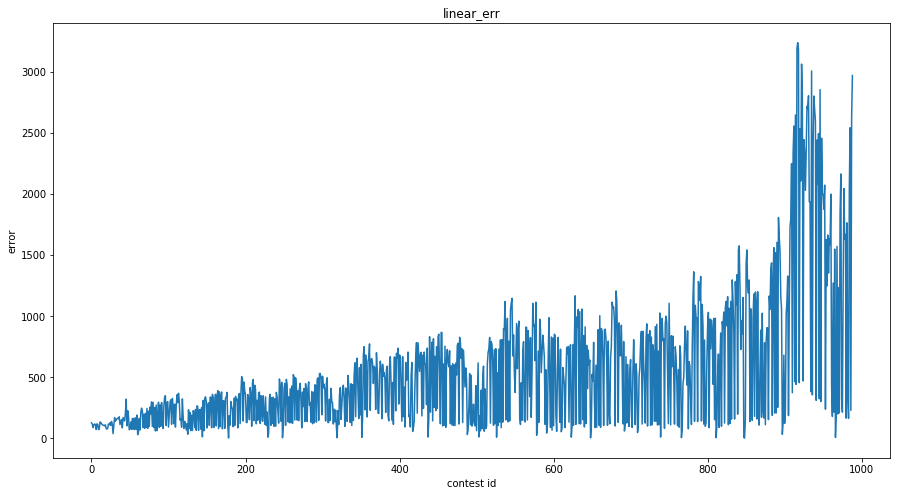

log_err: 0.6431339016089408 mean +- 0.04683847378956822 stdev


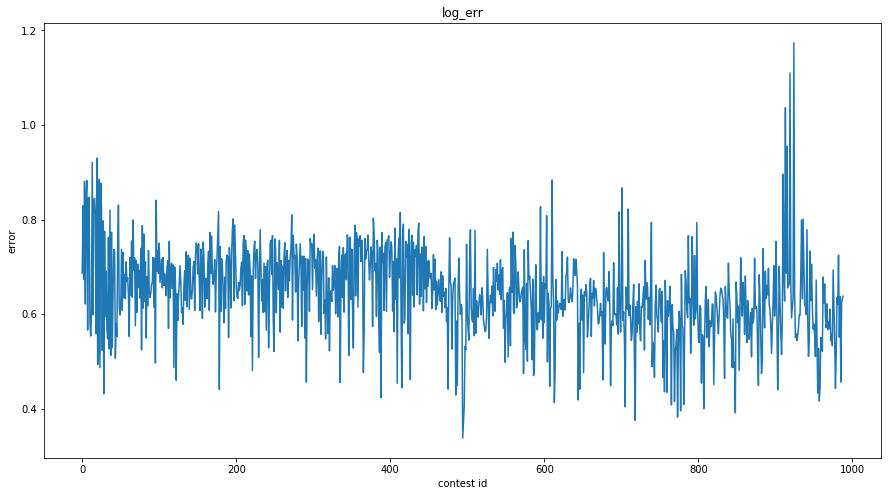

We will focused on the logarithmic error, cause the another one are dependent on the numbers of participants (which are increasing through contests)

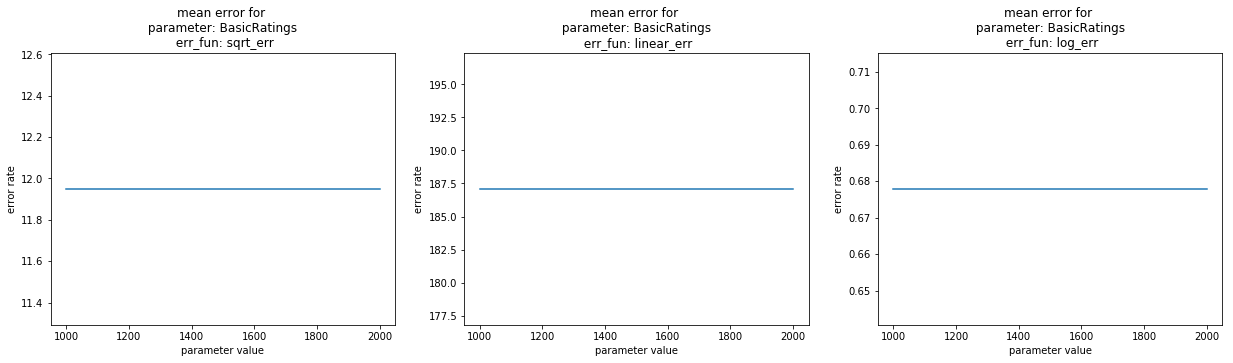

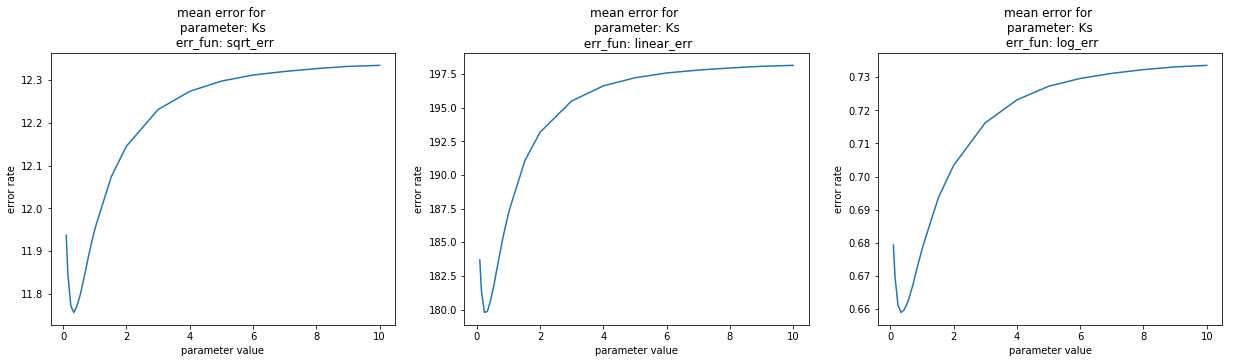

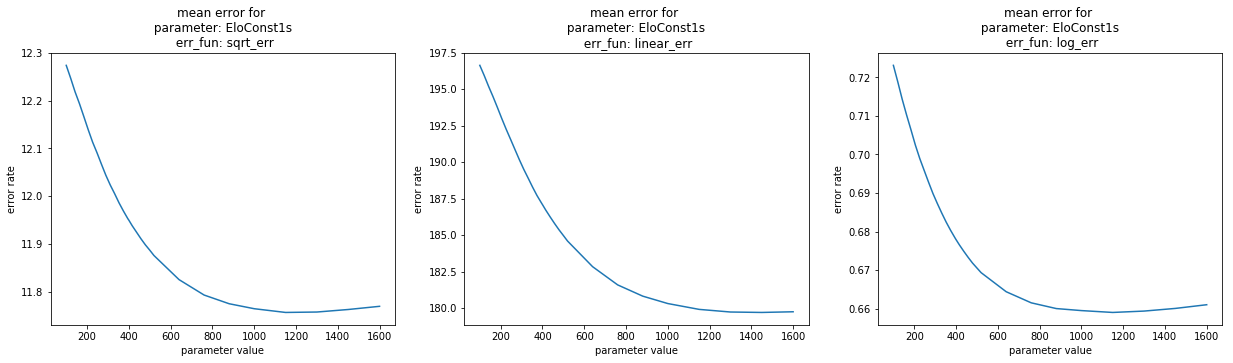

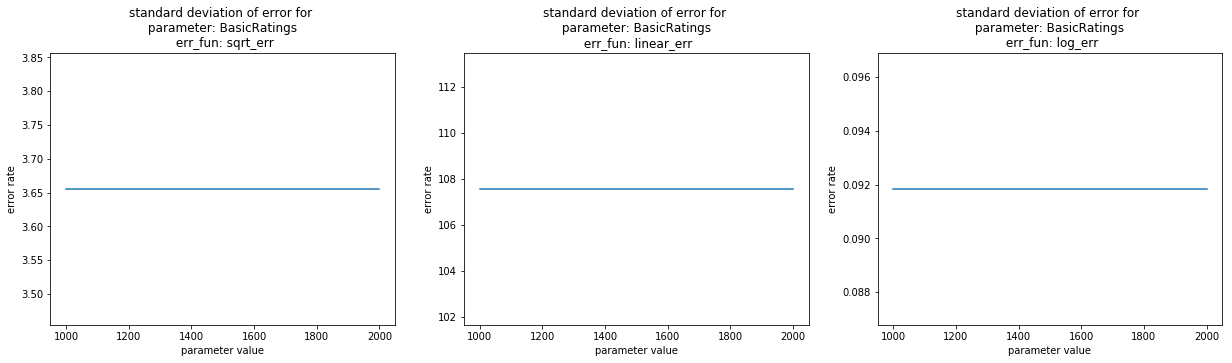

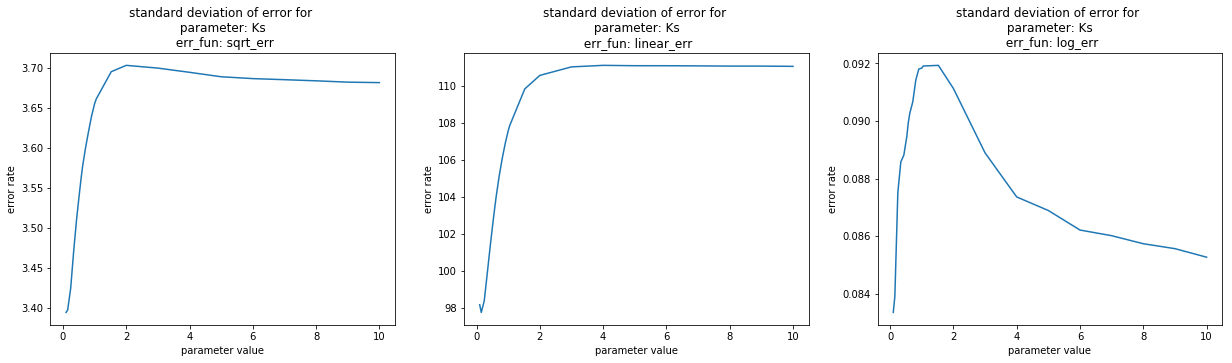

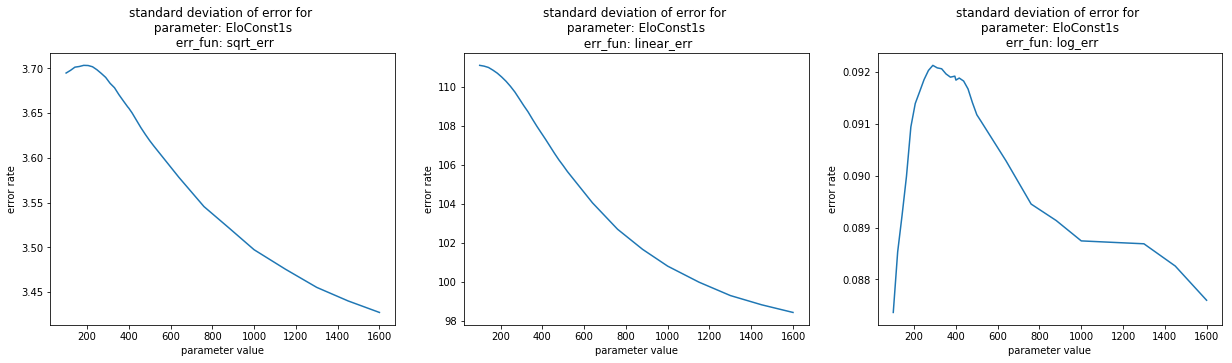

From the results we can interfer that the BasicRating does not influence our model. We tried to find the optimal value for k and EloConst1.

Searching for the optimal value of k.

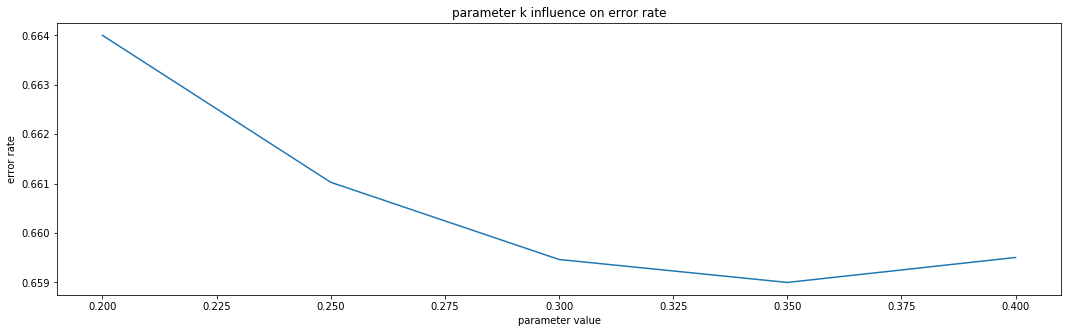

The optimal value found for k is 0.35

Now knowing the optimal k we tried to find the EloConst1, but the errors changed for the optimal k -> EloConst1 depends on k.

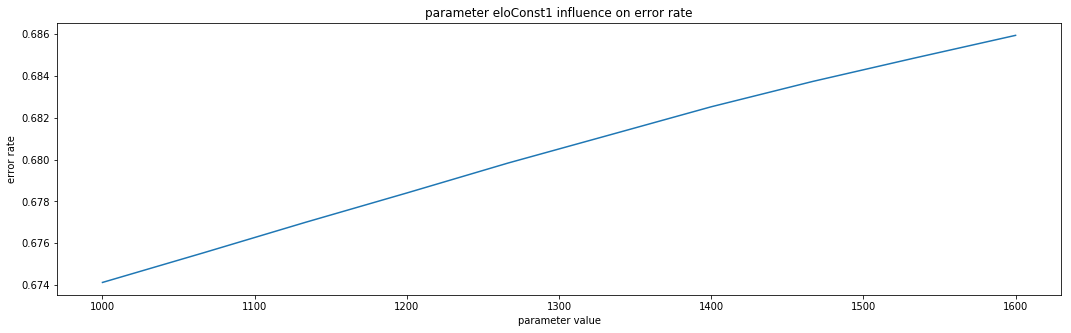

We change the range we checked before.

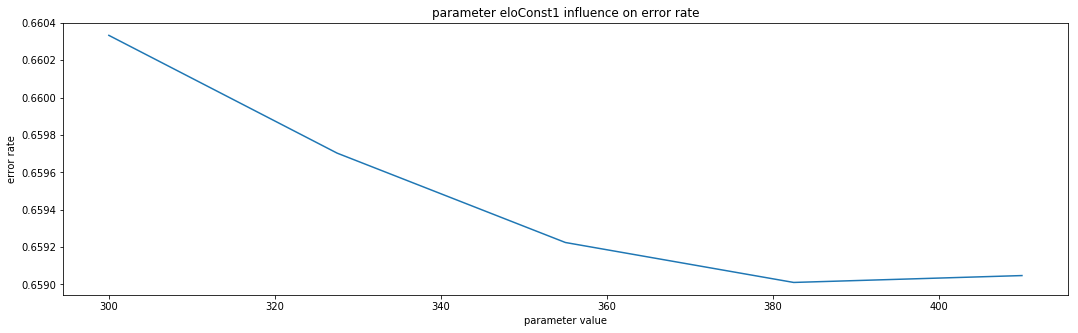

The optimal value of EloConst1 for k = 0.35 is 382.5

The logarithmic error for the optimal parameter is ...

### Topcoder rating system

#### Basics

Topcoder rating for each user keeps two values:
* Rating describing user's strength
* Volatility describing how likely is user's rating to change

After each contest, the rating and volatility are updated. Updates depend on:
* User's performance in the contest
* Number of contests written by the user
    * Users with fewer contests are more likely to have a higher rating change
* User's rating
    * Users with a higher rating are less likely to have larger rating change

The exact formulas are described [here](https://www.topcoder.com/community/competitive-programming/how-to-compete/ratings), thus we elude repeating them.

In the solution, we parametrized constants in the mentioned formulas in order to obtain better results.

#### Results

We start with presenting the comparison between Codeforces and Topcoder rating systems for selected users. We can observe that Topcoder's rating system prefers larger differences than Codeforces, i.e., high rated users have higher ratings, and low rated users have lower ratings.

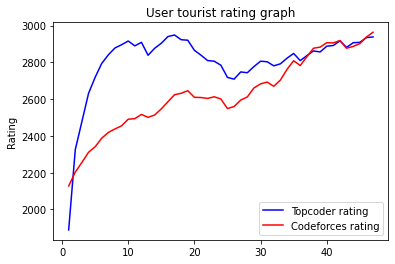

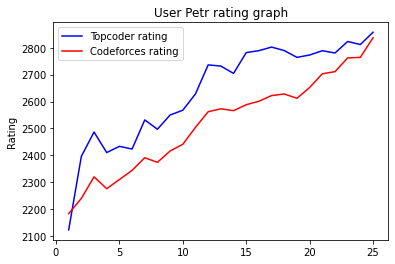

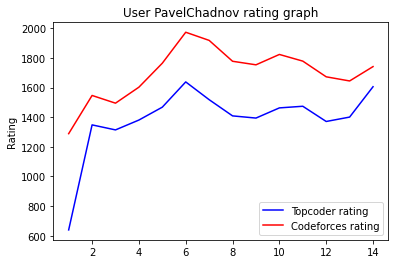

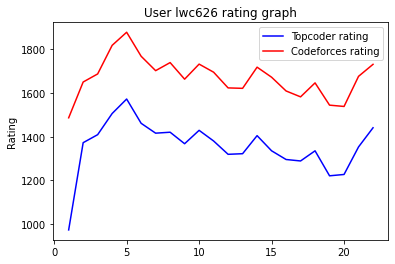

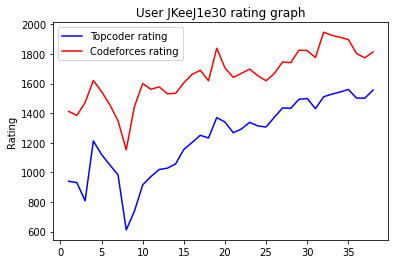

Here we present the comparison of predicted place by rating system (red line), and actual place (blue line). We see that the main problem with any prediction is the huge variation of the user's performance in the contest due to many unpredictable random events.

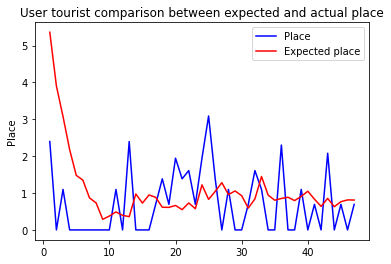

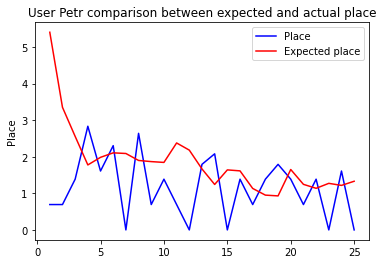

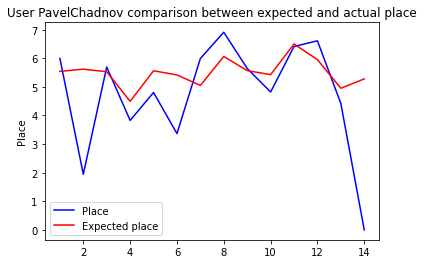

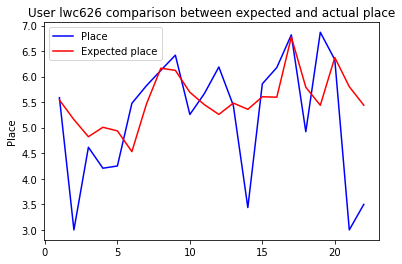

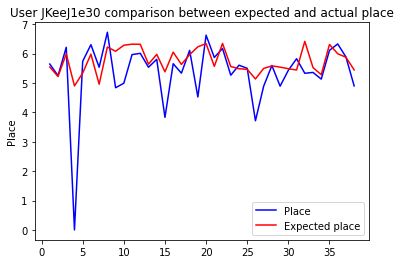

Finally, we move to the graph showing the average errors made by predictor. The regression line shows the trend, that the errors decrease in time. The reason is that we are able to gather more information about the user.

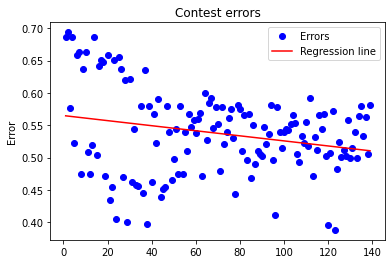

### Atcoder rating system

### Elo rating system

### Codeforces rating system


### Our custom rating system